<center> <h1>Αναγνώριση Προτύπων - 1η Εργαστηριακή Άσκηση</h1> </center>

---

<center> <h2>Θέμα: Οπτική Αναγνώριση Ψηφίων</h2> </center>
<center> <h2>ΣΧΟΛΗ: ΣΗΜΜΥ</h2> </center>
<img src="pyrforos-digamma.png" width="100">

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

In [1]:
import sklearn
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.decomposition import PCA


def readData(data_type):

    dir = './pr_lab1_2016-17_data/' + data_type + '.txt'
    with open(dir, 'r') as file:
        lines = file.read().splitlines()
        # random.shuffle(lines)

    features, digits = [], []
    for line in lines:
        line = [float(i) for i in line.rstrip().split(" ")]
        features.append(line[1:])
        digits.append(int(line[0]))

    return np.asarray(features), np.asarray(digits)

## Βήμα 1
Μας δίνονται τα δεδομένα ήδη χωρισμένα σε Train και Τest και ακόμη μας δίνονται και τα αντίστοιχα labels μιας και έχουμε πρόβλημα supervised learning. Τα διαβάζουμε λοιπόν από τα δοθέντα αρχεία ως X_train, X_test και τα αντίστοιχα labels ως y_train, y_test.

In [2]:
# STEP 1
X_train, y_train = readData('train')
X_test, y_test = readData('test')

n_samples, n_features = X_train.shape
n_test_samples, _ = X_test.shape
n_classes = 10

## Βήμα 2

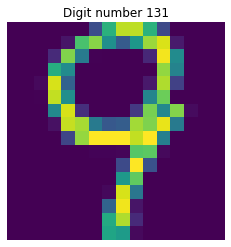

In [3]:
# STEP 2 - plot 131st digit
digit_131 = np.reshape(X_train[131],(16,16))
plt.figure()
plt.title("Digit number 131")
plt.axis("off")
plt.imshow(digit_131)
plt.show()

## Βήμα 3

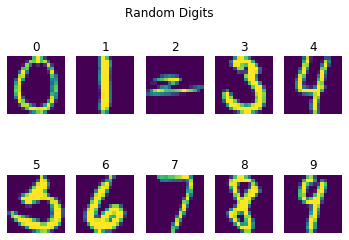

In [4]:
# STEP 3 - plot one sample for each digit 0-9
fig, axs = plt.subplots(2, 5)
fig.suptitle("Random Digits")
for digit in range(n_classes):
    rand = random.randint(0, n_samples-1)
    while (y_train[rand] != digit):
        rand = random.randint(0, n_samples-1)
    dig = np.reshape(X_train[rand],(16,16))
    axs[digit // 5, digit % 5].imshow(dig)
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

## Βήμα 4
Ομαδοποιώντας τα δεδομένα που έχουμε στο train set με βάση το label τους σε ένα dictionary της python και με τον τύπο της μέσης τιμής $E[X_{0 (10,10)}] = \frac{1}{N}\sum_{i=1}^{N} X_{0 (10,10)}[i]$ έχουμε:

In [5]:
digit_count = np.zeros(n_classes)
digit_mean = np.zeros((n_classes, n_features))
digit_var = np.zeros((n_classes, n_features))

for i in range(n_samples):
    digit = y_train[i]
    digit_count[digit] = digit_count[digit] + 1
    digit_mean[digit] = digit_mean[digit] + X_train[i]

for digit in range(n_classes):
    digit_mean[digit] = digit_mean[digit] / digit_count[digit]

digit_mean_zero = np.reshape(digit_mean[0],(16,16))
print("The mean value of pixel (10,10) of 0 is:", digit_mean_zero[10][10])

The mean value of pixel (10,10) of 0 is: -0.5041884422110553


## Βήμα 5
Με την παραπάνω ομαδοποίηση και σύμφωνα με τον τύπο $Var(X_{0 (10,10)}) = E[X_{0 (10,10)} - \mu_{0 (10,10)}^2] = \frac{1}{N}\sum_{i=1}^{N} (X_{0 (10,10)}[i] - E[X_0])^2$ έχουμε:

In [6]:
# STEP 5
for i in range(n_samples):
    digit = y_train[i]
    digit_var[digit] = digit_var[digit] + (X_train[i] - digit_mean[digit])**2

# Digit based on Variance
for digit in range(n_classes):
    digit_var[digit] = digit_var[digit] / (digit_count[digit] - 1)
digit_var_zero = np.reshape(digit_var[0],(16,16))
print("The variance value of pixel (10,10) of 0 is:", digit_var_zero[10][10])

The variance value of pixel (10,10) of 0 is: 0.5249618093885225


## Βήμα 6

Τυπώνοντας τις τιμές για τα πρώτα 4 features έχουμε:

In [7]:
# STEP 6

print("The mean value of 0 is: (first 4 numbers)", digit_mean[0][0:4])
print("The variance value of 0 is: (first 4 numbers)", digit_var[0][0:4])

The mean value of 0 is: (first 4 numbers) [-0.99862814 -0.99539782 -0.98492295 -0.94125126]
The variance value of 0 is: (first 4 numbers) [0.00224711 0.00661218 0.01960704 0.06295393]


## Βήμα 7

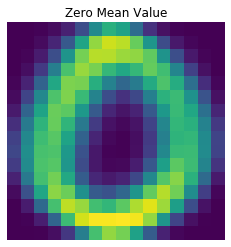

In [8]:
# STEP 7
plt.figure()
plt.title("Zero Mean Value")
plt.axis("off")
plt.imshow(digit_mean_zero)
plt.show()

## Βήμα 8

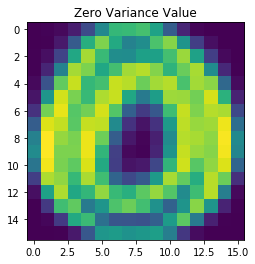

In [9]:
# STEP 8
plt.figure()
plt.title("Zero Variance Value")
plt.imshow(digit_var_zero)
plt.show()

> Παρατηρούμε ότι η διασπορά μας δίνει πληροφορία για το σε ποια σημεία γίνεται συνήθως όμοια ο σχεδιασμός του ψηφίου (πχ πάνω και κάτω), ενώ φαίνεται ότι δεξιά και αριστερά η διασπορά έχει μεγάλη τιμή που υποδεικνύει ότι ο σχεδιασμός του μηδενός ως προς το πόσο «πλατύ» είναι ποικίλει.

## Βήμα 9
Τυπώνοντας μόνο το την τιμή για το πρώτο feature έχουμε:

The mean value of 0 is: (first number only) -0.9986281407035177
The variance value of 0 is: (first number only) 0.002247105527638201
The mean value of 1 is: (first number only) -1.0
The variance value of 1 is: (first number only) 0.0
The mean value of 2 is: (first number only) -0.9924883720930233
The variance value of 2 is: (first number only) 0.005090387193373648
The mean value of 3 is: (first number only) -0.9975151975683889
The variance value of 3 is: (first number only) 0.0012149350807067123
The mean value of 4 is: (first number only) -1.0
The variance value of 4 is: (first number only) 0.0
The mean value of 5 is: (first number only) -0.9994586330935253
The variance value of 5 is: (first number only) 0.0001629514388489166
The mean value of 6 is: (first number only) -1.0
The variance value of 6 is: (first number only) 0.0
The mean value of 7 is: (first number only) -0.9749162790697675
The variance value of 7 is: (first number only) 0.017963918445760705
The mean value of 8 is: (first

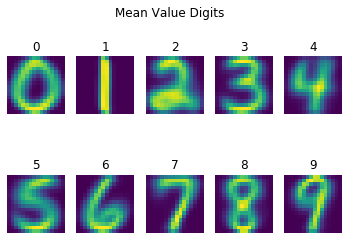

In [10]:
# STEP 9(a)
for digit in range(n_classes):
    print("The mean value of", digit, "is: (first number only)", digit_mean[digit][0])
    print("The variance value of", digit, "is: (first number only)", digit_var[digit][0])

# STEP 9(b)

# Digit based on Mean
fig, axs = plt.subplots(2, 5)
fig.suptitle("Mean Value Digits")
for digit in range(n_classes):
    axs[digit // 5, digit % 5].imshow(np.reshape(digit_mean[digit],(16,16)))
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

## Βήμα 10
Σύμφωνα με τον τύπο $pred(X) = \arg\min_{0 \leq i \leq 9} \| \mu - X \|_2$ έχουμε:

In [11]:
# STEP 10

digit_101_pred = np.argmin(np.linalg.norm(digit_mean - X_test[101], axis = 1))
print("Actual value of digit 101:", y_test[101])
print("The result of the Euclidean Classifier on digit 101 is:", digit_101_pred)

Actual value of digit 101: 6
The result of the Euclidean Classifier on digit 101 is: 0


> Παρατηρούμε πως η πρόβλεψη του ταξινομητή μας είναι λανθασμένη.

## Βήμα 11
Βρίσκοντας την ελάχιστη Ευκλείδεια απόσταση και συγκρίνοντας την με τo label y για κάθε δείγμα στο test set μας έχουμε:

In [12]:
# STEP 11

# Minimum Euclidean Distance from Mean
accuracy = 0.0
for i in range(n_test_samples):
    accuracy += np.argmin(np.linalg.norm(digit_mean - X_test[i], axis = 1)) == y_test[i]
accuracy /= n_test_samples
print("The accuracy of the Euclidean Classifier on the test set is:", accuracy)

The accuracy of the Euclidean Classifier on the test set is: 0.8141504733432985


## Βήμα 12
Καλούμαστε να υλοποιήσουμε τον ταξινομητή ευκλείδιας απόστασης σαν ένα scikit-learn estimator. Δημιουργούμε την κλάση EuclideanClassifier και εν συνεχεία υλοποιούμε τις μεθόδους fit, predict και score ως εξής:

- `fit()`: Υπολογίζει τα features για την κάθε κατηγορία βάσει του μέσου όρου των χαρακτηριστικών των δεδομένων εκπαίδευσης της εκάστοτε κατηγορίας
- `predict()`: Δεδομένου ενός δείγματος κάνει μια πρόβλεψη βάσει της ελάχιστης από τις ευκλείδιες αποστάσεις από τα διανύσματα χαρακτηριστικών της κάθε κατηγορίας.
- `score()`: Υπολογίζει το ποσοστό επιτυχίας του ταξινομητή πάνω σε κάποιο Test Set.


In [13]:
# STEP 12

from sklearn.base import BaseEstimator, ClassifierMixin
from collections import defaultdict
import numpy as np

class EuclideanClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None
        self.n_samples = None
        self.n_features = None
        self.n_classes = None
        self.idx2class = None
        self.class2idx = None


    def fit(self, X, y):

        """
        This should fit classifier. All the "work" should be done here.

        Calculates self.X_mean_ based on the mean
        feature values in X for each class.

        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        fit always returns self.
        """

        n_samples, n_features = X.shape
        n_classes = len(set(y))
        idx2class = sorted(list(set(y)))

        self.class2idx = defaultdict(lambda: None, {})

        for cl in idx2class:
            self.class2idx[cl] = idx2class.index(cl)

        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes

        cnt = np.zeros(n_classes)
        mean_val = np.zeros((n_classes, n_features))

        for i in range(n_samples):
            idx = self.class2idx[y[i]]
            cnt[idx] = cnt[idx] + 1
            mean_val[idx] = mean_val[idx] + X[i]

        # Digit based on Mean
        for i in range(n_classes):
            mean_val[i] = mean_val[i] / cnt[i]

        self.X_mean_ = mean_val

        return self


    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        n_test_samples, _ = X.shape
        C = np.array([np.argmin(np.linalg.norm(self.X_mean_ - X[i], axis = 1)) for i in range(n_test_samples)])
        
        return C


    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        n_test_samples, _ = X.shape
        y2idx = [self.class2idx[cl] for cl in y]
        accuracy = sum(np.equal(self.predict(X), y2idx)) / n_test_samples

        return accuracy


## Βήμα 13
**(α)**

In [14]:
# STEP 13

# Euclidean Classifier
clf = EuclideanClassifier()
clf.fit(X_train, y_train)

# 5-Fold Cross-Validation
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)
average_score = np.mean(cross_val_score(EuclideanClassifier(), X, y, cv = 5))
print("The average score using 5-fold cross-validation is:", average_score)

The average score using 5-fold cross-validation is: 0.841773724173982


**(β)** Τα features που αντιπροσωπεύουν κάθε ψηφίο αποτελούν διανύσματα 256 διαστάσεων και καλούμαστε να βρούμε τις περιοχές απόφασης (decision boundaries). Ωστόσο, προκειμένου να μπορέσει να γίνει οπτικοποίηση των περιοχών απόφασης θα εφαρμόσουμε PCA ώστε να μειώσουμε τον αριθμό των διαστάσεων απο 256 σε 2. Οι περιοχές απόφασης που θα υπολογίσουμε για τις δύο διαστάσεις δεν μας δίνουν το ίδιο καλή πληροφορία με τις 256, αλλά μπορούμε να έχουμε μια κάποια εικόνα των περιοχών απόφασης του εκτιμητή μας. Παρακάτω παρατίθεται το διάγραμμα αυτών των περιοχών απόφασης σε δύο διαστάσεις με τα χρωματισμένα σημεία των περιοχών να αποτέλουν τα δισδιάστατα διανύσματα χαρακτηριστικών για το εκάστοτε ψηφίου:

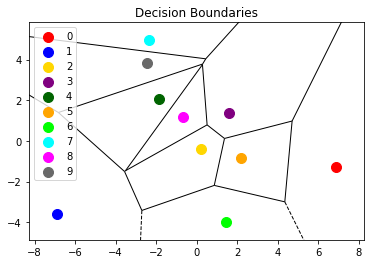

In [15]:
def plot_decision_boundaries(points):

    vor = Voronoi(points)
    voronoi_plot_2d(vor,show_points=False, show_vertices=False)
    plt.scatter(points[:,0], points[:,1], c=range(10), s=30, edgecolor = 'k')
    cdict = {0 : 'red', 1 : 'blue', 2 : 'gold', 3 : 'purple', 4 : 'darkgreen', 5 : 'orange', 6 : 'lime', 7 : 'cyan', 8 : 'magenta', 9 : 'dimgray'}

    for point,label in zip(points,range(10)):
        plt.scatter(point[0], point[1], c=cdict[label], label = label, s = 100)
        label += 1
    plt.legend(prop={'size':10})
    plt.title('Decision Boundaries')
    plt.show()

    return

# PCA 256 to 2 dims => for Decision Boundaries visualization
X_train_reduced = PCA(n_components=2).fit_transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)

clf2 = EuclideanClassifier()
clf2.fit(X_train_reduced, y_train)

# Plot Decision Boundaries for 2 dims
plot_decision_boundaries(clf2.X_mean_)

**(γ)** Για όλα μας τα δεδομένα (test και train μαζί) και χρησιμοποιώντας 5-fold cross-validation έχουμε τις παρακάτω καμπύλες εκμάθησης (learning curves):

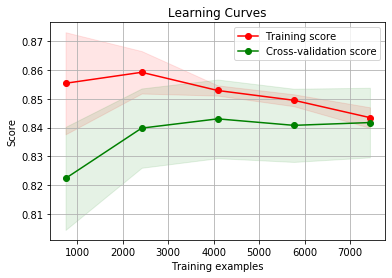

In [16]:
# 13.c
# Plot Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

plot_learning_curve(EuclideanClassifier(), "Learning Curves", X, y, cv = 5, n_jobs= 4)

## Βήμα 17

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings


# Gaussian Naive Bayes
gnb = GaussianNB()
print("The GaussianNB Classifier score is:", gnb.fit(X_train, y_train).score(X_test, y_test))

# K Nearest Neighbors
for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
    print("The KNN Classifier with k =", k, "score is:", knn.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (Linear SVC)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    supl = svm.LinearSVC()
    print("The SVM Linear Classifier score is:", supl.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (SVC)
sup1 = svm.SVC(gamma='scale', probability=True)
print("The SVM Classifier score is:", sup1.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (SVC) with RBF kernel
sup2 = svm.SVC(gamma='auto', probability=True)
print("The SVM Classifier score with RBF kernel is:", sup2.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (SVC) with Polynomial kernel
sup3 = svm.SVC(kernel='poly', gamma='auto', probability=True)
print("The SVM Classifier score with Polynomial kernel is:", sup3.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (SVC) with Sigmoid kernel
sup4 = svm.SVC(kernel='sigmoid', gamma='auto', probability=True)
print("The SVM Classifier score with Sigmoid kernel is:", sup4.fit(X_train, y_train).score(X_test, y_test))

# Support Vector Machine (SVC) with Linear kernel
sup5 = svm.SVC(kernel='linear', gamma='auto', probability=True)
print("The SVM Classifier score with Linear kernel is:", sup5.fit(X_train, y_train).score(X_test, y_test))

The GaussianNB Classifier score is: 0.7194818136522172
The KNN Classifier with k = 1 score is: 0.9436970602889886
The KNN Classifier with k = 2 score is: 0.9412057797708022
The KNN Classifier with k = 3 score is: 0.9446935724962631
The KNN Classifier with k = 4 score is: 0.9431988041853513
The KNN Classifier with k = 5 score is: 0.9446935724962631
The KNN Classifier with k = 6 score is: 0.9387144992526159
The KNN Classifier with k = 7 score is: 0.9417040358744395
The SVM Linear Classifier score is: 0.9043348281016442
The SVM Classifier score is: 0.9471848530144494
The SVM Classifier score with RBF kernel is: 0.9422022919780767
The SVM Classifier score with Polynomial kernel is: 0.9466865969108121
The SVM Classifier score with Sigmoid kernel is: 0.9147982062780269
The SVM Classifier score with Linear kernel is: 0.9262580966616841


In [19]:
gnb_pred = gnb.predict(X_test)
knn_pred = knn.predict(X_test)
sup2_pred = sup2.predict(X_test)
sup3_pred = sup3.predict(X_test)
sup4_pred = sup4.predict(X_test)
sup5_pred = sup5.predict(X_test)

In [21]:
def find_errors(predictions, y):
    errors = y[predictions != y]
    unique, counts = np.unique(errors, return_counts=True)
    all_errors = dict(zip(unique, counts))
    more_errors = max(all_errors, key=all_errors.get)
    return all_errors, more_errors
knn3 = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree').fit(X_train, y_train)
knn4 = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree').fit(X_train, y_train)
knn3_pred = knn3.predict(X_test)
knn4_pred = knn4.predict(X_test)

gnb_errors,gnb_err_label = find_errors(gnb_pred, y_test)
knn3_errors, knn3_err_label = find_errors(knn3_pred, y_test)
knn4_errors, knn4_err_label = find_errors(knn4_pred, y_test)
sup2_errors,sup2_err_label = find_errors(sup2_pred, y_test)
sup3_errors,sup3_err_label = find_errors(sup3_pred, y_test)
sup4_errors,sup4_err_label = find_errors(sup4_pred, y_test)
sup5_errors,sup5_err_label = find_errors(sup5_pred, y_test)

print(gnb_errors)
print(gnb_err_label)

print(knn3_errors)
print(knn3_err_label)

print(knn4_errors)
print(knn4_err_label)

print(sup2_errors)
print(sup2_err_label)

print(sup3_errors)
print(sup3_err_label)

print(sup4_errors)
print(sup4_err_label)

print(sup5_errors)
print(sup5_err_label)


{0: 64, 1: 10, 2: 57, 3: 88, 4: 144, 5: 86, 6: 19, 7: 15, 8: 56, 9: 24}
4
{0: 4, 1: 6, 2: 15, 3: 13, 4: 17, 5: 16, 6: 7, 7: 9, 8: 15, 9: 9}
4
{0: 4, 1: 6, 2: 15, 3: 11, 4: 16, 5: 17, 6: 8, 7: 10, 8: 18, 9: 9}
8
{0: 4, 1: 9, 2: 17, 3: 20, 4: 12, 5: 13, 6: 11, 7: 10, 8: 13, 9: 7}
3
{0: 4, 1: 9, 2: 15, 3: 16, 4: 11, 5: 10, 6: 12, 7: 10, 8: 13, 9: 7}
3
{0: 8, 1: 8, 2: 29, 3: 26, 4: 16, 5: 22, 6: 13, 7: 13, 8: 28, 9: 8}
2
{0: 8, 1: 8, 2: 17, 3: 20, 4: 20, 5: 24, 6: 10, 7: 12, 8: 22, 9: 7}
5


## Βήμα 18
**(α)**

In [22]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = svm.SVC(gamma='scale')
clf2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('SVC-rbf', sup2), ('SVC-poly', sup3), 
                                     ('SVC-sigmoid', sup3), ('SVC-linear', sup4),
                                     ('4NN', knn4), ('gnb', gnb),
                                     ('3NN', knn3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.score(X_test, y_test))

0.9471848530144494


In [28]:
from sklearn.linear_model import LogisticRegression
# clf1 = svm.SVC(gamma='scale', probability = True)
# clf2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
gnb = GaussianNB()
knn5 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn3 = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

eclf1 = VotingClassifier(estimators=[('SVC-rbf', sup2), ('SVC-poly', sup3), 
                                     ('SVC-sigmoid', sup3), ('SVC-linear', sup4),
                                     ('5NN', knn5), ('gnb', gnb),
                                     ('3NN', knn3)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.score(X_test, y_test))

0.9466865969108121
